In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [114]:
df = pd.read_csv(r"/content/weather_classification_data.csv")

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


In [116]:
df.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


In [117]:
df.isnull().sum()

Temperature             0
Humidity                0
Wind Speed              0
Precipitation (%)       0
Cloud Cover             0
Atmospheric Pressure    0
UV Index                0
Season                  0
Visibility (km)         0
Location                0
Weather Type            0
dtype: int64

In [118]:
df.isna().sum()

Temperature             0
Humidity                0
Wind Speed              0
Precipitation (%)       0
Cloud Cover             0
Atmospheric Pressure    0
UV Index                0
Season                  0
Visibility (km)         0
Location                0
Weather Type            0
dtype: int64

In [119]:
df.columns

Index(['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)',
       'Cloud Cover', 'Atmospheric Pressure', 'UV Index', 'Season',
       'Visibility (km)', 'Location', 'Weather Type'],
      dtype='object')

In [120]:
df.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


In [121]:
x = ["Temperature","Wind Speed","Precipitation (%)","Atmospheric Pressure","Visibility (km)"]

for i in x:
  df[x] = df[x].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Temperature           13200 non-null  int64 
 1   Humidity              13200 non-null  int64 
 2   Wind Speed            13200 non-null  int64 
 3   Precipitation (%)     13200 non-null  int64 
 4   Cloud Cover           13200 non-null  object
 5   Atmospheric Pressure  13200 non-null  int64 
 6   UV Index              13200 non-null  int64 
 7   Season                13200 non-null  object
 8   Visibility (km)       13200 non-null  int64 
 9   Location              13200 non-null  object
 10  Weather Type          13200 non-null  object
dtypes: int64(7), object(4)
memory usage: 1.1+ MB


### Detecting Outliers for all the INT dtype Columns

In [122]:
Q1 = df["Temperature"].quantile(0.25)
Q3 = df["Temperature"].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df["Temperature"]<lower_bound) | (df["Temperature"]>upper_bound)]
df = df[~df.index.isin(outliers.index)]

len(outliers),df.shape

(92, (13108, 11))

In [123]:
Q1 = df["Wind Speed"].quantile(0.25)
Q3 = df["Wind Speed"].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df["Wind Speed"]<lower_bound) | (df["Wind Speed"]>upper_bound)]
df = df[~df.index.isin(outliers.index)]

len(outliers),df.shape

(416, (12692, 11))

In [124]:
Q1 = df["Atmospheric Pressure"].quantile(0.25)
Q3 = df["Atmospheric Pressure"].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df["Atmospheric Pressure"]<lower_bound) | (df["Atmospheric Pressure"]>upper_bound)]
df = df[~df.index.isin(outliers.index)]

len(outliers),df.shape

(924, (11768, 11))

In [125]:
Q1 = df["UV Index"].quantile(0.25)
Q3 = df["UV Index"].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df["UV Index"]<lower_bound) | (df["UV Index"]>upper_bound)]
df = df[~df.index.isin(outliers.index)]

len(outliers),df.shape

(110, (11658, 11))

In [126]:
Q1 = df["Visibility (km)"].quantile(0.25)
Q3 = df["Visibility (km)"].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df["Visibility (km)"]<lower_bound) | (df["Visibility (km)"]>upper_bound)]
df = df[~df.index.isin(outliers.index)]

len(outliers),df.shape

(98, (11560, 11))

### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------


In [127]:
df.shape

(11560, 11)

In [128]:
df.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14,73,9,82,partly cloudy,1010,2,Winter,3,inland,Rainy
1,39,96,8,71,partly cloudy,1011,7,Spring,10,inland,Cloudy
2,30,64,7,16,clear,1018,5,Spring,5,mountain,Sunny
3,38,83,1,82,clear,1026,7,Spring,1,coastal,Sunny
4,27,74,17,66,overcast,990,1,Winter,2,mountain,Rainy


# Analysis Part

## When season is Snowy, what would be the chances of precipitation?


In [129]:

df.head()

snowy_data = df[df["Weather Type"] == "Snowy"]

avg_snowy_data = snowy_data["Precipitation (%)"].mean()

precipitation_percent = ((avg_snowy_data/df["Weather Type"].count()))*10000

print(precipitation_percent)
# print(snowy_data.index)

65.49152460491435


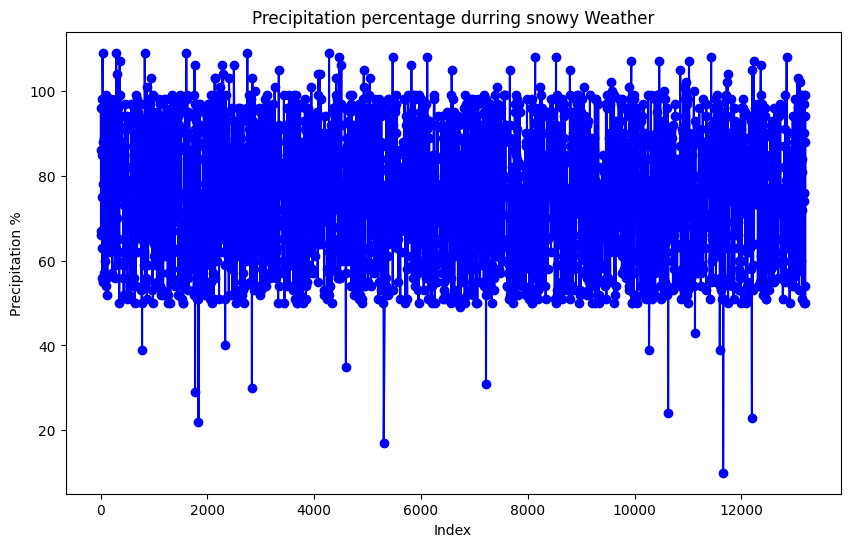

In [130]:
# Plot the snowy vs precipitation

plt.figure(figsize=(10,6))
plt.plot(snowy_data.index,snowy_data["Precipitation (%)"],marker = 'o',linestyle="-",color="b")
plt.title("Precipitation percentage durring snowy Weather")
plt.xlabel("Index")
plt.ylabel("Precipitation %")
plt.show()


In [131]:
df["Cloud Cover"].unique()

array(['partly cloudy', 'clear', 'overcast', 'cloudy'], dtype=object)

## When season is summer, what would be the chances of cloud cover as partly cloudy?


In [132]:
# When season is summer, what would be the chances of cloud cover as partly cloudy?

summer_data = df[df["Season"] == "Summer"]
partly_cloudy_count = summer_data[summer_data["Cloud Cover"] == "partly cloudy"].shape[0]
total_summer_count = summer_data.shape[0]

partly_cloud_chances_in_summer = (partly_cloudy_count/total_summer_count)*100
print(f"The chances of cloud cover being 'Partly Cloudy' during the summer season are approximately {partly_cloud_chances_in_summer:.2f}%.")


The chances of cloud cover being 'Partly Cloudy' during the summer season are approximately 39.91%.


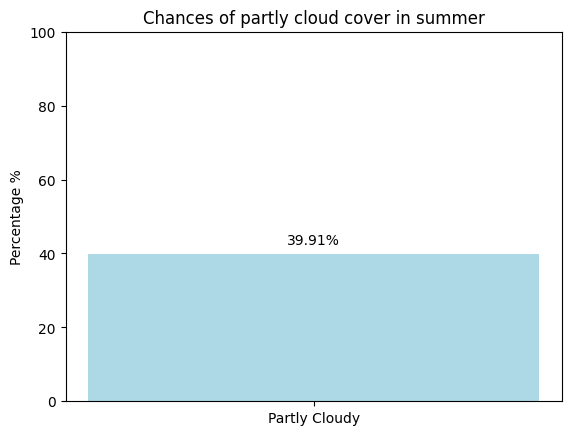

In [133]:
fig , ax = plt.subplots()
ax.bar(["Partly Cloudy"],[partly_cloud_chances_in_summer],color="lightblue")
ax.set_ylabel("Percentage %")
ax.set_title("Chances of partly cloud cover in summer")
ax.set_ylim(0,100)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

## Relation between Wind speed and Weather Type?

In [134]:
df.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14,73,9,82,partly cloudy,1010,2,Winter,3,inland,Rainy
1,39,96,8,71,partly cloudy,1011,7,Spring,10,inland,Cloudy
2,30,64,7,16,clear,1018,5,Spring,5,mountain,Sunny
3,38,83,1,82,clear,1026,7,Spring,1,coastal,Sunny
4,27,74,17,66,overcast,990,1,Winter,2,mountain,Rainy


In [135]:
(",".join(map(str,list(df["Weather Type"].unique()))))

'Rainy,Cloudy,Sunny,Snowy'

In [136]:
x = (",".join(map(str,list(df["Wind Speed"].unique()))))

In [137]:
# get the mean value for all the precipitation for rainy season
Rainy_Data = df[df["Weather Type"] == "Rainy"]

avg_rainy_data = Rainy_Data["Precipitation (%)"].mean()
print(round(avg_rainy_data))


Cloud_Data = df[df["Weather Type"] == "Cloudy"]

avg_cloudy_data = Cloud_Data["Precipitation (%)"].mean()
print(round(avg_cloudy_data))



Sunny_Data = df[df["Weather Type"] == "Sunny"]

avg_sunny_data = Sunny_Data["Precipitation (%)"].mean()
print(round(avg_sunny_data))


Snowy_Data = df[df["Weather Type"] == "Snowy"]

avg_snowy_data = Snowy_Data["Precipitation (%)"].mean()
print(round(avg_snowy_data))



75
37
20
76


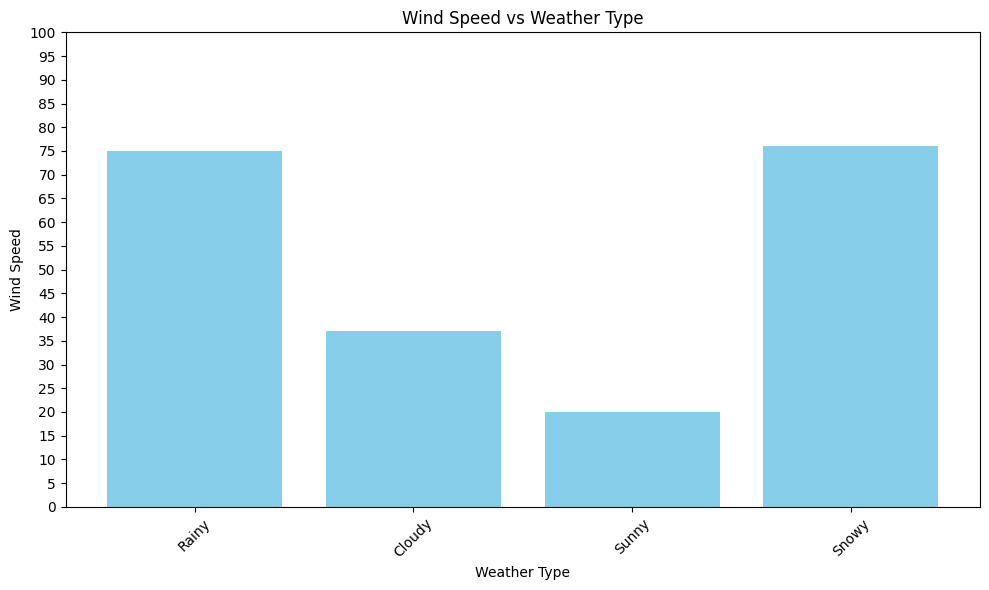

In [138]:
x = ["Rainy","Cloudy","Sunny","Snowy"]
y = [round(avg_rainy_data),round(avg_cloudy_data),round(avg_sunny_data),round(avg_snowy_data)]
plt.figure(figsize=(10,6))
plt.bar(x,y,color="skyblue")

plt.xlabel("Weather Type")
plt.ylabel("Wind Speed")
plt.title("Wind Speed vs Weather Type")
plt.ylim(0, 100)  # Set y-axis limit from 0 to 50
plt.yticks(range(0, 101, 5))  # Set y-axis ticks from 0 to 50 with 5 as spacing
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility if needed

plt.tight_layout()
plt.show()

## Visualize the relation between Humidity and temperature.

In [139]:
df.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14,73,9,82,partly cloudy,1010,2,Winter,3,inland,Rainy
1,39,96,8,71,partly cloudy,1011,7,Spring,10,inland,Cloudy
2,30,64,7,16,clear,1018,5,Spring,5,mountain,Sunny
3,38,83,1,82,clear,1026,7,Spring,1,coastal,Sunny
4,27,74,17,66,overcast,990,1,Winter,2,mountain,Rainy


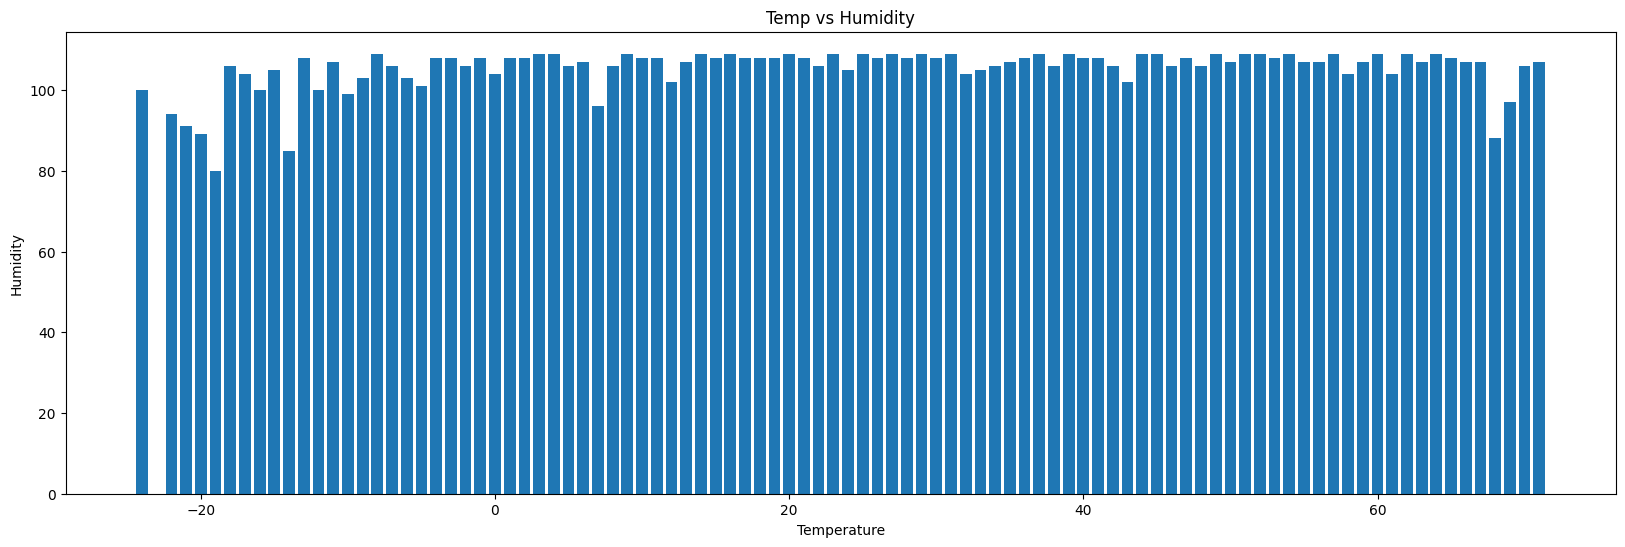

In [140]:
x = df["Temperature"]
y = df["Humidity"]
plt.figure(figsize=(20,6))
plt.bar(x,y)
plt.xlabel("Temperature")
plt.ylabel("Humidity")
plt.title("Temp vs Humidity")
plt.show()

## Is there any relationship between Atmospheric pressure and Precipitation? If yes then Visualize it.

In [141]:
df.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14,73,9,82,partly cloudy,1010,2,Winter,3,inland,Rainy
1,39,96,8,71,partly cloudy,1011,7,Spring,10,inland,Cloudy
2,30,64,7,16,clear,1018,5,Spring,5,mountain,Sunny
3,38,83,1,82,clear,1026,7,Spring,1,coastal,Sunny
4,27,74,17,66,overcast,990,1,Winter,2,mountain,Rainy


In [142]:
df_temp = df["Temperature"][:100]
df_atm_pressure = df["Atmospheric Pressure"][:100]

df[["Temperature","Atmospheric Pressure"]]

,Temperature,Atmospheric Pressure
0,14,1010
1,39,1011
2,30,1018
3,38,1026
4,27,990
...,...,...
13194,29,1002
13195,10,1003
13197,30,1012
13198,3,984


In [143]:
df["Temperature"]

0        14
1        39
2        30
3        38
4        27
         ..
13194    29
13195    10
13197    30
13198     3
13199    -5
Name: Temperature, Length: 11560, dtype: int64

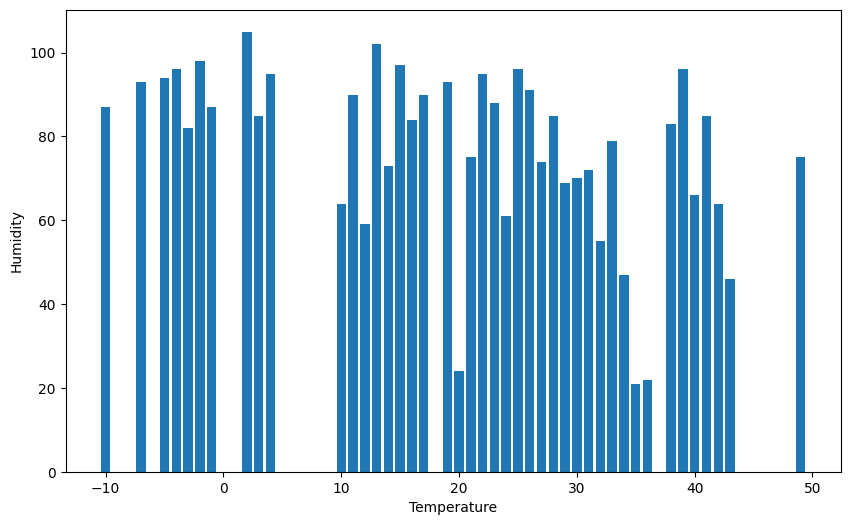

In [144]:
plt.figure(figsize=(10,6))
x = df["Temperature"][:100]
y = df["Humidity"][:100]
plt.bar(x,y)
plt.xlabel("Temperature")
plt.ylabel("Humidity")
plt.show()

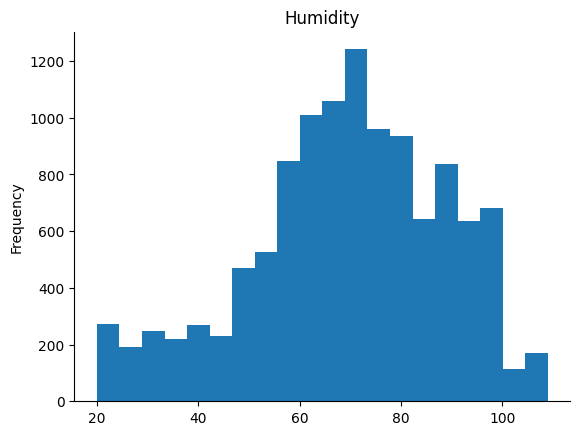

In [145]:
df['Humidity'].plot(kind='hist', bins=20, title='Humidity')
plt.gca().spines[['top', 'right',]].set_visible(False)

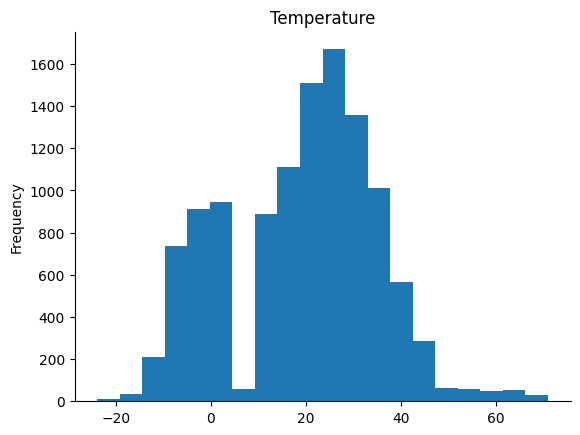

In [146]:
from matplotlib import pyplot as plt
df['Temperature'].plot(kind='hist', bins=20, title='Temperature')
plt.gca().spines[['top', 'right',]].set_visible(False)

## Establish the relation between UV Index and Weather Type.

In [147]:
df.columns

Index(['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)',
       'Cloud Cover', 'Atmospheric Pressure', 'UV Index', 'Season',
       'Visibility (km)', 'Location', 'Weather Type'],
      dtype='object')

In [148]:
df["UV Index"]

0        2
1        7
2        5
3        7
4        1
        ..
13194    2
13195    1
13197    3
13198    0
13199    5
Name: UV Index, Length: 11560, dtype: int64

In [149]:
df["Weather Type"].unique()

array(['Rainy', 'Cloudy', 'Sunny', 'Snowy'], dtype=object)

In [150]:
# Find the possible values of UV Index when weather type is Sunny
sunny_uv_index = df[df["Weather Type"]== "Sunny"][["UV Index"]]

In [151]:
sunny_uv_index

,UV Index
2,5
3,7
9,8
11,11
14,8
...,...
13188,10
13189,7
13190,11
13191,8


#### Above is the list of all possible uv index when the weather is sunny

# Prediction Part

In [152]:
# Predict the chances of precipitation when Season is Winter


df.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14,73,9,82,partly cloudy,1010,2,Winter,3,inland,Rainy
1,39,96,8,71,partly cloudy,1011,7,Spring,10,inland,Cloudy
2,30,64,7,16,clear,1018,5,Spring,5,mountain,Sunny
3,38,83,1,82,clear,1026,7,Spring,1,coastal,Sunny
4,27,74,17,66,overcast,990,1,Winter,2,mountain,Rainy


In [153]:
df_1 = df.copy()

In [154]:
winter_df = df_1[df_1["Season"] == "Winter"]

In [155]:
winter_df.shape

(5059, 11)

In [156]:
winter_df.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14,73,9,82,partly cloudy,1010,2,Winter,3,inland,Rainy
4,27,74,17,66,overcast,990,1,Winter,2,mountain,Rainy
6,-2,97,8,86,overcast,990,1,Winter,4,inland,Snowy
7,3,85,6,96,partly cloudy,984,1,Winter,3,inland,Snowy
8,3,83,6,66,overcast,999,0,Winter,1,mountain,Snowy


In [157]:
winter_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5059 entries, 0 to 13198
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Temperature           5059 non-null   int64 
 1   Humidity              5059 non-null   int64 
 2   Wind Speed            5059 non-null   int64 
 3   Precipitation (%)     5059 non-null   int64 
 4   Cloud Cover           5059 non-null   object
 5   Atmospheric Pressure  5059 non-null   int64 
 6   UV Index              5059 non-null   int64 
 7   Season                5059 non-null   object
 8   Visibility (km)       5059 non-null   int64 
 9   Location              5059 non-null   object
 10  Weather Type          5059 non-null   object
dtypes: int64(7), object(4)
memory usage: 474.3+ KB


In [158]:
# Applying label_Encoding on Object dtypes so that we can convert it into Int

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

label_encoder = LabelEncoder()

In [159]:
winter_df["Cloud Cover"] = label_encoder.fit_transform(winter_df["Cloud Cover"])
winter_df["Season"] = label_encoder.fit_transform(winter_df["Season"])
winter_df["Location"] = label_encoder.fit_transform(winter_df["Location"])
winter_df["Weather Type"] = label_encoder.fit_transform(winter_df["Weather Type"])

<ipython-input-159-82f19cc71ccd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  winter_df["Cloud Cover"] = label_encoder.fit_transform(winter_df["Cloud Cover"])
<ipython-input-159-82f19cc71ccd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  winter_df["Season"] = label_encoder.fit_transform(winter_df["Season"])
<ipython-input-159-82f19cc71ccd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

In [160]:
winter_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5059 entries, 0 to 13198
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Temperature           5059 non-null   int64
 1   Humidity              5059 non-null   int64
 2   Wind Speed            5059 non-null   int64
 3   Precipitation (%)     5059 non-null   int64
 4   Cloud Cover           5059 non-null   int64
 5   Atmospheric Pressure  5059 non-null   int64
 6   UV Index              5059 non-null   int64
 7   Season                5059 non-null   int64
 8   Visibility (km)       5059 non-null   int64
 9   Location              5059 non-null   int64
 10  Weather Type          5059 non-null   int64
dtypes: int64(11)
memory usage: 474.3 KB


In [161]:
winter_df.shape

(5059, 11)

In [162]:
winter_df.columns

Index(['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)',
       'Cloud Cover', 'Atmospheric Pressure', 'UV Index', 'Season',
       'Visibility (km)', 'Location', 'Weather Type'],
      dtype='object')

In [163]:
# Now all the Dtypes of Winter_DF is in INT64 We can move ahead with prediction

winter_df.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14,73,9,82,3,1010,2,0,3,1,1
4,27,74,17,66,2,990,1,0,2,2,1
6,-2,97,8,86,2,990,1,0,4,1,2
7,3,85,6,96,3,984,1,0,3,1,2
8,3,83,6,66,2,999,0,0,1,2,2


In [164]:
X = winter_df.drop("Precipitation (%)",axis = 1)
y = winter_df["Precipitation (%)"]

In [165]:
X_train,X_test ,y_train, y_test = train_test_split(X,y,test_size=0.35,random_state = 42)

In [166]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression



models = {
    'RandomForest': RandomForestRegressor(random_state=42),
    'GradientBoostingRegressor' : GradientBoostingRegressor(random_state=42),
       'AdaBoostRegressor': AdaBoostRegressor(random_state=42),
    'XGBRegressor': XGBRegressor(random_state=42),
    'LinearRegression': LinearRegression(),
    'DecisionTreeRegressor': DecisionTreeRegressor(random_state=42)
}

In [167]:
for name,model in models.items():
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  mae = mean_absolute_error(y_test, y_pred)

  print(f'{name} Mean Absolute Error: {mae:.2f}')

RandomForest Mean Absolute Error: 11.71
GradientBoostingRegressor Mean Absolute Error: 11.62
AdaBoostRegressor Mean Absolute Error: 12.57
XGBRegressor Mean Absolute Error: 12.25
LinearRegression Mean Absolute Error: 14.75
DecisionTreeRegressor Mean Absolute Error: 15.19
